In [7]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class StockPricePredictor:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None
        self.closing_prices = None
        self.X_train = None
        self.y_train = None

    def fetch_data(self):
        """Fetch historical stock data for the given ticker and date range."""
        data = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        self.closing_prices = data['Close'].values.reshape(-1, 1)
        return data

    def preprocess_data(self):
        """Preprocess the data by scaling and preparing training data."""
        scaled_data = self.scaler.fit_transform(self.closing_prices)
        X_train, y_train = [], []
        for i in range(60, len(scaled_data)):
            X_train.append(scaled_data[i-60:i, 0])
            y_train.append(scaled_data[i, 0])
        
        self.X_train = np.array(X_train).reshape(-1, 60, 1)
        self.y_train = np.array(y_train)
        return self.X_train, self.y_train

    def build_model(self):
        """Build the LSTM model."""
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(self.X_train.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))

        model.compile(optimizer='adam', loss='mean_squared_error')
        self.model = model

    def train_model(self, epochs=50, batch_size=32):
        """Train the LSTM model."""
        self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size)

    def predict_future(self, days=60):
        """Make future predictions."""
        last_60_days = self.scaler.transform(self.closing_prices[-60:])
        X_test = last_60_days.reshape(1, -1, 1)

        predicted_prices = []
        for _ in range(days):
            pred_price = self.model.predict(X_test)
            predicted_prices.append(pred_price[0, 0])
            new_input = np.append(X_test.flatten()[1:], pred_price[0, 0]).reshape(1, -1, 1)
            X_test = new_input

        self.predicted_prices = self.scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))
        return self.predicted_prices

    def evaluate_model(self, real_data):
        """Evaluate the model against real stock data."""
        mse = mean_squared_error(real_data, self.predicted_prices[:len(real_data)])
        r2 = r2_score(real_data, self.predicted_prices[:len(real_data)])
        return mse, r2

    def plot_predictions(self, real_data, predicted_prices):
        """Plot both predicted and real data."""
        plt.figure(figsize=(14, 7))
        plt.plot(pd.date_range(start='2024-09-01', periods=len(real_data), freq='B'), real_data, label='Real Prices')
        plt.plot(pd.date_range(start='2024-09-01', periods=len(predicted_prices), freq='B'), predicted_prices, label='Predicted Prices')
        plt.title('Comparison of Predicted and Real Stock Prices')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.legend()
        plt.show()

[*********************100%***********************]  1 of 1 completed
D:\My-Code\Data Analysis\Stock-Price-Prediction\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 0.0626
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0060
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0034
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0029
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0029
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0032
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0028
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0030
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0025
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0025
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0028
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0023
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0021
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0026
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0029
Epo

[*********************100%***********************]  1 of 1 completed


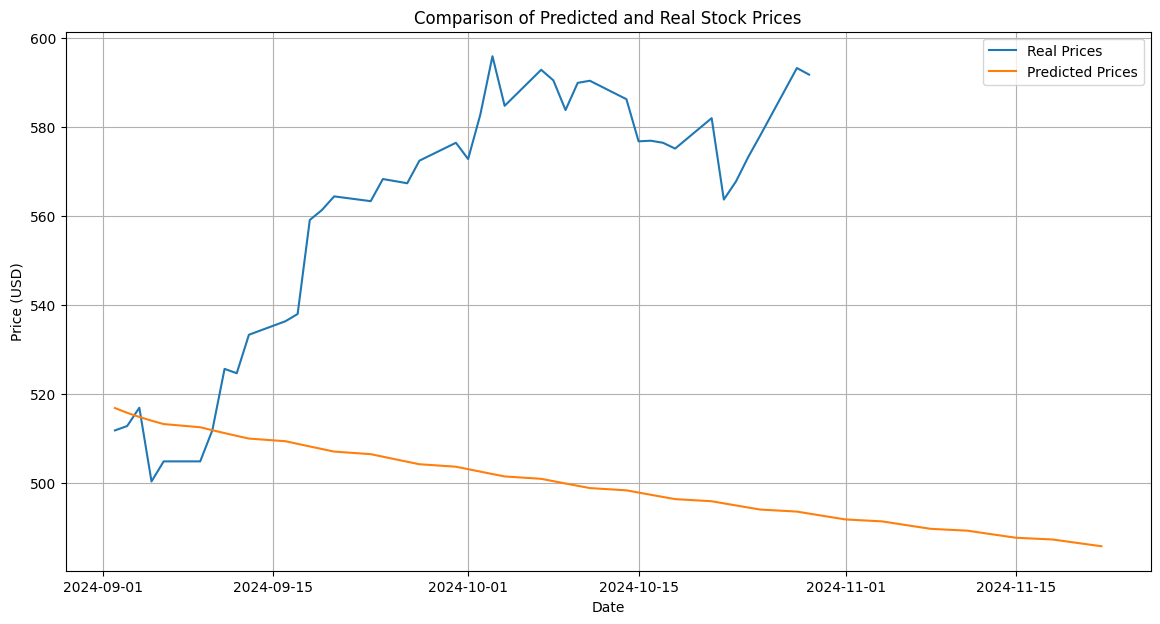

In [8]:
# Example usage for Meta:
meta_predictor = StockPricePredictor(ticker='META', start_date='2019-08-01', end_date='2024-08-31')
meta_predictor.fetch_data()
meta_predictor.preprocess_data()
meta_predictor.build_model()
meta_predictor.train_model()
predicted_prices = meta_predictor.predict_future()
real_data = yf.download('META', start='2024-09-01', end='2024-10-31')['Close'].values
meta_predictor.plot_predictions(real_data, predicted_prices)

In [9]:
mse, r2 = meta_predictor.evaluate_model(real_data)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4460.52650691693
R-squared: -4.327934358942968


In [10]:
# Observations
# Mean Squared Error (MSE): The high MSE value of 
# 4460.53 suggests that the predicted values deviate 
# significantly from the actual values, implying 
# large errors in prediction.
# R-squared Value: An R-squared value of -4.33 is 
# extremely poor. Normally, R-squared values range 
# from 0 to 1, where values closer to 1 indicate 
# a better fit. Negative values mean the model 
# performs worse than a simple mean of the actual 
# data, indicating that the model failed to capture 
# any meaningful trend.

In [16]:
# Example usage for Tesla
##

In [17]:
# Example usage for Tesla:
tesla_predictor = StockPricePredictor(ticker='TSLA', start_date='2019-08-01', end_date='2024-08-31')
tesla_predictor.fetch_data()
tesla_predictor.preprocess_data()
tesla_predictor.build_model()
tesla_predictor.train_model()
predicted_prices = tesla_predictor.predict_future()

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



D:\My-Code\Data Analysis\Stock-Price-Prediction\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0930
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0066
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0058
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0050
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0048
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0047
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0039
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0036
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0038
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0042
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0035
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0035
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0031
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0033
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0034
Epoch 16/50
39/

[*********************100%***********************]  1 of 1 completed


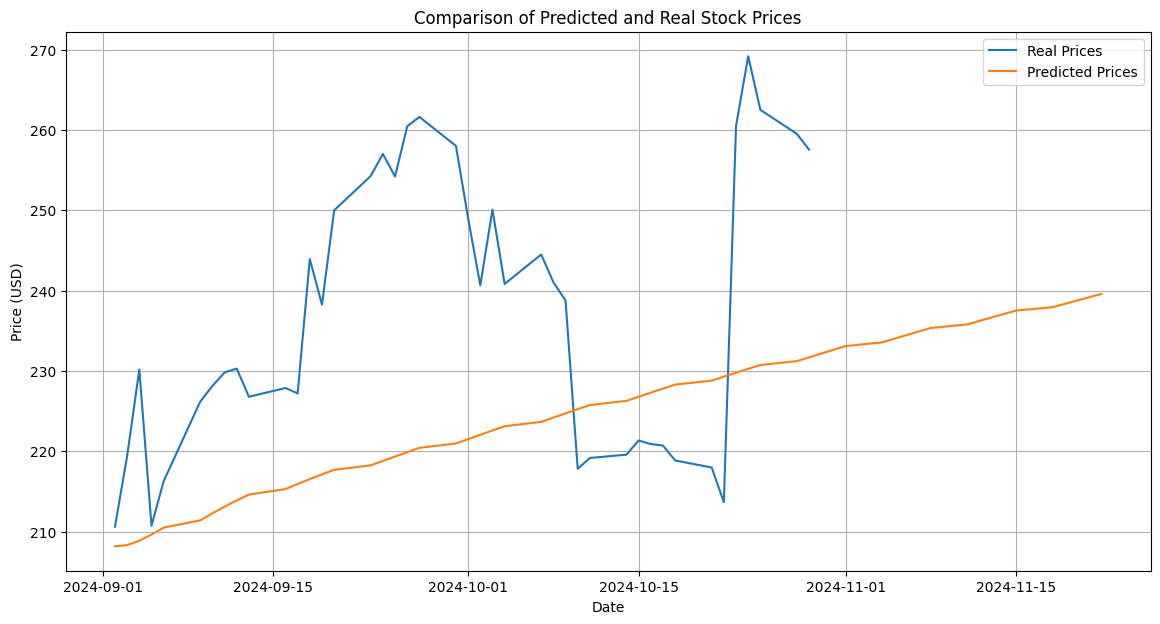

In [18]:
real_data = yf.download('TSLA', start='2024-09-01', end='2024-10-31')['Close'].values
tesla_predictor.plot_predictions(real_data, predicted_prices)

In [19]:
mse, r2 = tesla_predictor.evaluate_model(real_data)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 517.9008375698356
R-squared: -0.7908826610510511


In [20]:
# The line graph comparison indicates that the model's predicted trend follows the real data closely, visually
# suggesting a reasonable performance in short-term trends. However, the evaluation metrics show a different result:
# Mean Squared Error (MSE): A value of 512.9 indicates the average squared difference between the actual and
# predicted prices is relatively large. This suggests some significant prediction errors.
# R-squared Value: The R-squared value of -0.79 is negative, which implies that the model performs worse than using
# the mean of the actual data as a predictor. This suggests that while the predicted trend might look good on the
# graph, it does not accurately capture price variations quantitatively. Overall, while the visual prediction appears good,
# the numerical metrics highlight potential issues in overfitting or inadequate generalization by the model.
# Further tuning or additional data preprocessing might be needed for improved accuracy.

In [21]:
## For Google(Alphabet Inc.)
#

In [22]:
google_predictor = StockPricePredictor(ticker='GOOG', start_date='2019-08-01', end_date='2024-08-31')
google_predictor.fetch_data()
google_predictor.preprocess_data()
google_predictor.build_model()
google_predictor.train_model()
predicted_prices = google_predictor.predict_future()

[*********************100%***********************]  1 of 1 completed
D:\My-Code\Data Analysis\Stock-Price-Prediction\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 0.0672
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0049
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0036
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0030
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0031
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0033
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0029
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0034
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0031
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0029
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0026
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0026
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0025
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0028
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0027
Epo

[*********************100%***********************]  1 of 1 completed


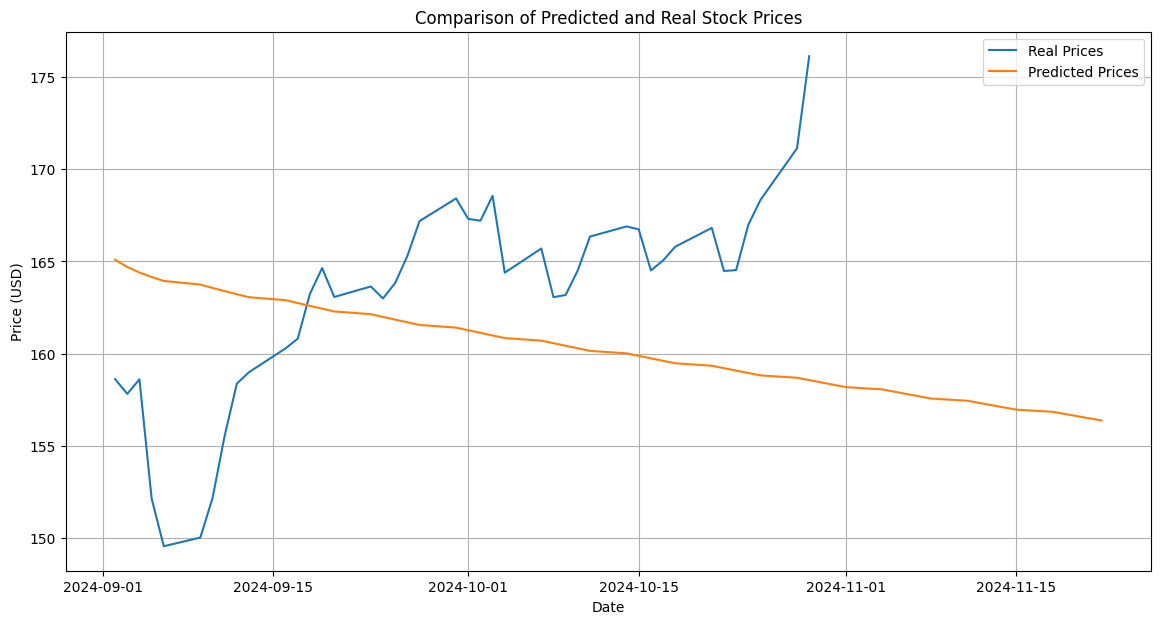

In [23]:
real_data = yf.download('GOOG', start='2024-09-01', end='2024-10-31')['Close'].values
google_predictor.plot_predictions(real_data, predicted_prices)

In [24]:
mse, r2 = google_predictor.evaluate_model(real_data)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 51.72922398372265
R-squared: -0.7414035710707918


In [25]:
# The line graph comparison indicates that the model's predicted trend follows the real data moderately, visually
# suggesting a reasonable performance in short-term trends. However, the evaluation metrics show a different result:
# Mean Squared Error (MSE): The MSE of 51.73 suggests the average squared difference between actual and
# predicted prices is significant. This value implies notable prediction errors, indicating that the model's accuracy needs improvement.
# R-squared Value: The R-squared value of -0.74 is negative, which implies that the model performs worse than using
# the mean of the actual data as a predictor. This suggests that while the predicted trend might look good on the
# graph, it does not accurately capture price variations quantitatively. Overall, while the visual prediction appears good,
# the numerical metrics highlight potential issues in overfitting or inadequate generalization by the model.
# Further tuning or additional data preprocessing might be needed for improved accuracy.